## Imports

In [1]:
from stats.kolmogorov_smirnov_test import KSTest
import random
import scipy
from scipy.stats import ksone
import numpy as np
import matplotlib.pyplot as plt

## Prepare the data

### Test for an uniform distribution

In [2]:
random.seed(0)
N = 1000
X = [random.uniform(0, 1) for _ in range(N)]
K = 30


#The Distribution to compare to, here a uniform distrib
cdf = [random.uniform(0, 1) for _ in range(N)]

kolmogorov_Smirnov_test_object = KSTest(K, cdf) # The KSTest object implemented

ks_results = {
    'histogram': [],
    'scipy': [],
    'critical': [],
    'quantile_ks': []}

for i, x in enumerate(X, start=1):
    
    kolmogorov_Smirnov_test_object.update(x)
    
    # Results with the our implemented algorithms
    ks_results['histogram'].append(kolmogorov_Smirnov_test_object.get('histogram'))
    ks_results['quantile_ks'].append(kolmogorov_Smirnov_test_object.get('quantile'))
    
    # Results with the scipy function
    ks_results['scipy'].append(scipy.stats.kstest(X[:i], cdf)[0])
    ks_results['critical'].append(ksone.ppf(1-0.005, i))


### Test for a normal distribution

In [4]:
random.seed(0)
N = 1000
X = np.random.normal(0, 1, N)
K = 30


#The Distribution to compare to, here a uniform distrib
cdf = [random.uniform(0, 1) for _ in range(N)]

kolmogorov_Smirnov_test_object = KSTest(K, cdf) # The KSTest object implemented

ks_results = {
    'histogram': [],
    'scipy': [],
    'critical': [],
    'quantile_ks': []}

for i, x in enumerate(X, start=1):
    
    kolmogorov_Smirnov_test_object.update(x)
    
    # Results with the our implemented algorithms
    ks_results['histogram'].append(kolmogorov_Smirnov_test_object.get('histogram'))
    ks_results['quantile_ks'].append(kolmogorov_Smirnov_test_object.get('quantile'))
    
    # Results with the scipy function
    ks_results['scipy'].append(scipy.stats.kstest(X[:i], cdf)[0])
    ks_results['critical'].append(ksone.ppf(1-0.005, i))

## Present our results

The hypothesis fails to reject if the KS value is below the critical value 



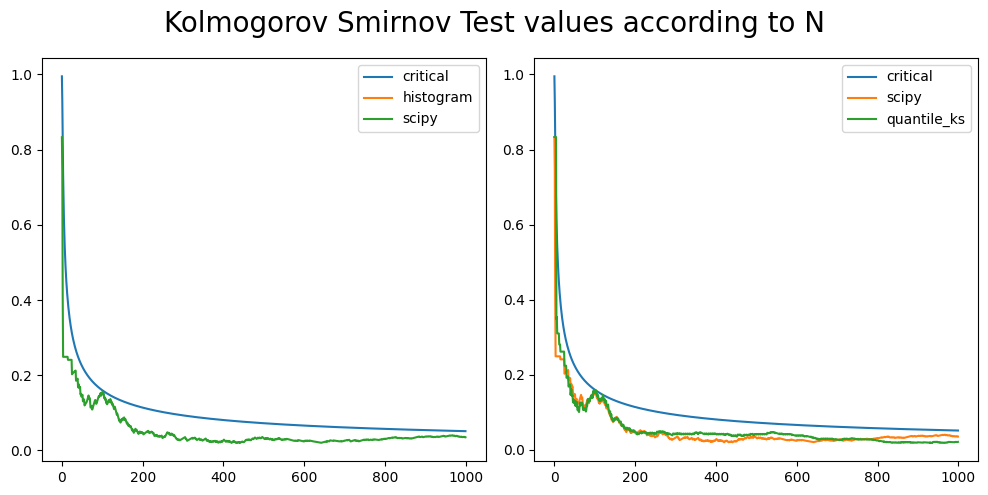

In [3]:
print('The hypothesis fails to reject if the KS value is below the critical value \n')

fig, ax = plt.subplots(1, 2, figsize=(10,5))

fig.suptitle('Kolmogorov Smirnov Test values according to N', fontsize=20)

ax[0].plot(ks_results['critical'], label='critical')
ax[0].plot(ks_results['histogram'], label='histogram')
ax[0].plot(ks_results['scipy'], label='scipy')
ax[0].legend()

ax[1].plot(ks_results['critical'], label='critical')
ax[1].plot(ks_results['scipy'], label='scipy')
ax[1].plot(ks_results['quantile_ks'], label='quantile_ks')
ax[1].legend()


#ax.set_xlim(50, 1000)
#ax.set_ylim(0, 100)

fig.tight_layout()